#Práctico 4: Métricas y Cross-Validation


## Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive, files
from sklearn import tree
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

##Carga de datos y preparación

El EDA de este dataset se realizó la clase pasada. Cargamos datos y aplicamos transformaciones ya vistas

In [ ]:
drive.mount('/content/drive')
breast_cancer_df=pd.read_csv("/content/drive/My Drive/data/breast-cancer-wisconsin.csv", header = None,sep = ",")

breast_cancer_df.columns = ["Id", "clump_thicknes", "cell_size", "cell_shape", "adhesion", "epithelial_cell_size", "nuclei", "chromatin", "nucleoli", "mitoses", "target"]
breast_cancer_df["target"].replace(2, 0, inplace=True)
breast_cancer_df["target"].replace(4, 1, inplace=True)
breast_cancer_df.drop(columns=["Id", "nuclei"], inplace=True)
breast_cancer_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,clump_thicknes,cell_size,cell_shape,adhesion,epithelial_cell_size,nuclei,chromatin,nucleoli,mitoses,target
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [ ]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   clump_thicknes        699 non-null    int64
 1   cell_size             699 non-null    int64
 2   cell_shape            699 non-null    int64
 3   adhesion              699 non-null    int64
 4   epithelial_cell_size  699 non-null    int64
 5   nuclei                699 non-null    int64
 6   chromatin             699 non-null    int64
 7   nucleoli              699 non-null    int64
 8   mitoses               699 non-null    int64
 9   target                699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


## Separación de datos

In [ ]:
random_state = 42

X = breast_cancer_df.drop(['target'], axis=1)
y = breast_cancer_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state = random_state)

##Entrenamiento

In [ ]:
def init_models():
  arbol_entropy = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5) 
  arbol_entropy_more_complex = tree.DecisionTreeClassifier(criterion="entropy") 
  return arbol_entropy, arbol_entropy_more_complex

In [ ]:
arbol_entropy, arbol_entropy_more_complex = init_models()

In [ ]:
arbol_entropy.fit(X_train, y_train)
arbol_entropy_more_complex.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

##Métricas para evaluación


Con el classification_report veo los valores de cada métrica para una  predicción.

In [ ]:
print("Árbol simple:\n", classification_report(y_test, arbol_entropy.predict(X_test)))

Árbol simple:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       164
           1       0.92      0.89      0.91        81

    accuracy                           0.94       245
   macro avg       0.93      0.93      0.93       245
weighted avg       0.94      0.94      0.94       245



In [ ]:
print("Árbol más complejo:\n", classification_report(y_test, arbol_entropy_more_complex.predict(X_test)))

Árbol más complejo:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       164
           1       0.89      0.91      0.90        81

    accuracy                           0.93       245
   macro avg       0.92      0.93      0.93       245
weighted avg       0.94      0.93      0.93       245



Accuracy: Cuantos predije correctamente.  

= (TP + TN) / (TP + FP + TN + FN)  
= (TP + TN) / MuestrasTotales

In [ ]:
accuracy_score(y_test, arbol_entropy.predict(X_test))

0.9387755102040817

Precision: Cuantos de los que dije que eran true, realmente lo eran.  

= TP / (TP + FP)

In [ ]:
precision_score(y_test, arbol_entropy.predict(X_test))

0.9230769230769231

Recall: Cuantos de los que eran true logré predecir correctamente.  
= TP / (TP + FN)

In [ ]:
recall_score(y_test, arbol_entropy.predict(X_test))

0.8888888888888888

F1-Score: Media armónica entre Precision y Recall.
2 * (P * R) / (P + R)

In [ ]:
f1_score(y_test, arbol_entropy.predict(X_test))

0.9056603773584906

Weighted accuracy mide la accuracy "pesando" cada una de las categorías. Cuando esos pesos los definimos inversamente proporcionales al soporte de cada elemento (el que se ve menos representado, "pesa más"), entonces Weighted Accuracy = MAR

### Ejercicio 1
Defina una función get_tnpf que reciba y_true, y_pred y retorne cantidad de TP, TN, FP y FN.

Firma y assertions a utilizar:  

```
def get_tnpf(y_true, y_pred):
  assert type(y_true) is type(np.ndarray(shape=(2,2))), 'Only numpy.ndarray allowed in y_true.'
  assert type(y_pred) is type(np.ndarray(shape=(2,2))), 'Only numpy.ndarray allowed in y_pred.'
  assert len(y_pred) == len(y_true), 'y_pred must be the same length as y_true'
```



In [ ]:
# Su código

### Ejercicio 2
Utilizando la función get_tnpf(), defina defina 3 funciones que calculen accuracy, precision, recall, f1-score. Compare los resultados con los obtenidos anteriormente desde sklearn.

Firmas a utilizar:  


```
def manually_precision_score(y_true, y_pred):
  pass
```  

```
def manually_recall_score(y_true, y_pred):
  pass
```  

```
def manually_accuracy_score(y_true, y_pred):
  pass
```  

```
def manually_f1_score(y_true, y_pred):
  pass
```  




In [ ]:
# Su código

In [ ]:
print("Precision manually:",manually_precision_score(y_test.to_numpy(), arbol_entropy.predict(X_test)),"\nPrecision SKLearn: ",precision_score(y_test, arbol_entropy.predict(X_test)),"\n")
print("Recall manually:",manually_recall_score(y_test.to_numpy(), arbol_entropy.predict(X_test)),"\nRecall SKLearn: ",recall_score(y_test, arbol_entropy.predict(X_test)),"\n")
print("Accuracy manually:",manually_accuracy_score(y_test.to_numpy(), arbol_entropy.predict(X_test)),"\nAccuracy SKLearn: ",accuracy_score(y_test, arbol_entropy.predict(X_test)),"\n")
print("F1-Score manually:",manually_f1_score(y_test.to_numpy(), arbol_entropy.predict(X_test)),"\nF1-Score SKLearn: ",f1_score(y_test, arbol_entropy.predict(X_test)),"\n")

Precision manually: 0.9113924050632911 

Recall manually: 0.8888888888888888 

Accuracy manually: 0.9346938775510204 

F1-Score manually: 0.8999999999999999


##K-Fold Cross Validation

In [ ]:
arbol_entropy, arbol_entropy_more_complex = init_models()

In [ ]:
scores_cv_simplest = cross_val_score(arbol_entropy, X_train, y_train, cv=5, scoring='accuracy')
scores_cv_complex = cross_val_score(arbol_entropy_more_complex, X_train, y_train, cv=5, scoring='accuracy')

In [ ]:
#Metricas aceptadas
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
print("Accuracy (k-folds)")
print("==================\n")
print(f'(Simplest tree) = {np.mean(scores_cv_simplest)} {scores_cv_simplest}')
print(f'(Complex tree) = {np.mean(scores_cv_complex)} {scores_cv_complex}')

Accuracy (k-folds)

(Simplest tree) = 0.9449328449328449 [0.91208791 0.97802198 0.93406593 0.95604396 0.94444444]
(Complex tree) = 0.9317460317460317 [0.92307692 0.95604396 0.93406593 0.9010989  0.94444444]


Una forma de buscar un hiperparámetro óptimo utilizando CV

In [ ]:
for alpha in [2, 3, 4, 6, 10, 15, 20]:
  arbol_aux = tree.DecisionTreeClassifier(criterion="entropy", max_depth=alpha) 
  scores_arbol_aux = cross_val_score(arbol_aux, X_train, y_train, cv=5, scoring='accuracy')
  print(f'(alpha) = {alpha} (mean score) = {np.mean(scores_arbol_aux)}')

(alpha) = 2 (mean score) = 0.933894993894994
(alpha) = 3 (mean score) = 0.9449328449328449
(alpha) = 4 (mean score) = 0.9427350427350427
(alpha) = 6 (mean score) = 0.9449328449328449
(alpha) = 10 (mean score) = 0.9295482295482295
(alpha) = 15 (mean score) = 0.936141636141636
(alpha) = 20 (mean score) = 0.9493284493284493


###K-Fold (manual)
Definamos una función que haga lo mismo que cross_val_score de sklearn

In [ ]:
import math
k = 5

def k_folds(X, y, k):
  assert(len(X) == len(y))
  folds_X = []
  folds_y = []
  initial_pos = 0
  elementsCount=len(X)
  elementsPerFold=math.ceil(elementsCount/k)

  for i in range(k):#0,1,2,3,4
    to_pos = min(elementsPerFold*(i+1), elementsCount)
    
    x_fold = X[initial_pos:to_pos]
    y_fold = y[initial_pos:to_pos]

    folds_X.append(x_fold)
    folds_y.append(y_fold)

    initial_pos = to_pos

  return folds_X, folds_y

### Ejercicio 3
Defina la función evaluate que utiliza k\_fold\_cross\_val.

Firma a utilizar:  



```
def evaluate(model, evaluation_function, X_to_eval, y_to_eval):
  pass
```



In [ ]:
# Su código

In [ ]:
def k_fold_cross_val(folds_X, folds_y, model, evaluation_function):
  assert(len(folds_X) == len(folds_y))
  X_to_eval = []
  y_to_eval = []
  elementsCount=len(folds_X)
  scores = []
  for i in range(elementsCount):
    X_to_train = []
    y_to_train = []
    for j in range(elementsCount):
      if  i == j:
        X_to_eval = folds_X[i]
        y_to_eval = folds_y[i]
      else:
        X_to_train.append(folds_X[j])
        y_to_train.append(folds_y[j])

    #tenia lista append, transformo en martriz concatenando listas
    X_train = np.concatenate(X_to_train)
    y_train = np.concatenate(y_to_train)
    
    model.fit(X_train,y_train)

    score = round(evaluate(model, evaluation_function, X_to_eval, y_to_eval),8)
    scores.append(score)
  return np.mean(np.array(scores)), scores

In [ ]:
folds_X, folds_y = k_folds(X_train, y_train, 5)

In [ ]:
arbol_entropy, arbol_entropy_more_complex = init_models()
k_fold_result_mean, k_fold_result_arr = k_fold_cross_val(folds_X, folds_y, arbol_entropy, accuracy_score)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

In [ ]:
arbol_entropy, arbol_entropy_more_complex = init_models()
scores_cv = cross_val_score(arbol_entropy, X_train, y_train, cv=5, scoring='accuracy')

In [ ]:
print("Accuracy (k-folds)")
print("==================\n")
print(f'(SKLearn CV) = {np.mean(scores_cv)} {scores_cv}')
print(f'(Manually CV) = {k_fold_result_mean} {k_fold_result_arr}')

Accuracy (k-folds)

(SKLearn CV) = 0.9427350427350427 [0.93406593 0.94505495 0.93406593 0.95604396 0.94444444]
(Manually CV) = 0.9405372405372405 [0.9340659340659341, 0.945054945054945, 0.9230769230769231, 0.9560439560439561, 0.9444444444444444]


###Grid Search CV

In [ ]:
# definimos la grilla de parámetros que queremos evaluar
param_grid = [
  {'max_depth': [2, 3, 5, 10, 15], 'min_samples_split': [2, 5, 10, 15], 'criterion': ['entropy', 'gini']}
 ]

# Definimos modelo a utilizar
arbol = tree.DecisionTreeClassifier() 

# Definimos un nuevo modelo GridSearch utilizando el arbol y la grilla
CV_model = GridSearchCV(estimator=arbol, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenamos para buscar los mejores paráemtros
CV_model.fit(X_train, y_train)
CV_results_arbol = pd.DataFrame(CV_model.cv_results_)
CV_results_arbol.to_csv('cv_results_arbol.csv')
CV_model.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}

In [ ]:
!dir

cv_results_arbol.csv  drive  sample_data


In [ ]:
files.download('cv_results_arbol.csv') 

In [ ]:
CV_results_arbol.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003754,0.000512,0.005536,0.005870,entropy,2,2,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.934066,0.923077,0.956044,0.934066,0.922222,0.933895,0.012198,17
1,0.003636,0.000852,0.004467,0.002464,entropy,2,5,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.934066,0.923077,0.956044,0.934066,0.922222,0.933895,0.012198,17
2,0.004017,0.000309,0.002666,0.000135,entropy,2,10,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.934066,0.923077,0.956044,0.934066,0.922222,0.933895,0.012198,17
3,0.005452,0.001818,0.003032,0.000417,entropy,2,15,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.934066,0.923077,0.956044,0.934066,0.922222,0.933895,0.012198,17
4,0.005395,0.002969,0.003169,0.001137,entropy,3,2,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.934066,0.945055,0.967033,0.912088,0.944444,0.940537,0.017827,8


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       164
           1       0.90      0.93      0.91        81

    accuracy                           0.94       245
   macro avg       0.93      0.94      0.94       245
weighted avg       0.94      0.94      0.94       245
 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


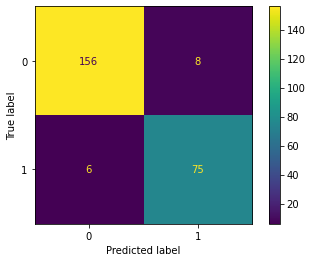

In [ ]:
arbol_best_parameters = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2)
arbol_best_parameters.fit(X_train, y_train)
y_pred = arbol_best_parameters.predict(X_test)

print(classification_report(y_test, y_pred),"\n")
plot_confusion_matrix(arbol_best_parameters, X_test, y_test)

## Ejercicio 4
El dataset cardio_train.csv contiene 70mil registros con 11 features para clasificar si una persona tiene o no una enfermedad cardiovascular.  

El objetivo de este ejercicio es que carguen el dataset, lo exploren, hagan las modificaciones necesarias, entrenen modelos, ajusten hiperparámetros, predigan y evalúen resultados.

(Los comentarios anteriores son a modo de guía, utilicen las herramientas vistas hasta el momento como consideren correcto).

Descripción de las features:

* Age (age): int (days)
* Height (height): int (cm)
* Weight (weight): float (kg)
* Gender (gender): categorical code
* Systolic blood pressure (ap_hi): int
* Diastolic blood pressure (ap_lo): int
* Cholesterol (cholesterol): 
  * 1: normal
  * 2: above normal
  * 3: well above normal
* Glucose (gluc): 
  * 1: normal
  * 2: above normal
  * 3: well above normal
* Smoking (smoke): binary
* Alcohol intake (alco): binary
* Physical activity (active): binary
* Presence or absence of cardiovascular disease (cardio): binary

In [ ]:
cardio_df = pd.read_csv("/content/drive/My Drive/data/cardio_train.csv", sep = ";")

In [ ]:
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Su código